In [1]:
import yahoo
import pandas as pd

In [2]:
puts = pd.read_csv('outputs/puts_output.csv')
calls = pd.read_csv('outputs/calls_output.csv')

data = pd.concat([puts, calls])

data['SD/MA'] = data['STD']/data['MA']
data['% MA to adj'] = ((data['adjclose']/data['MA'])-1).apply(lambda x: abs(x))
data['% ADJ to Strike'] = ((data['Strike']/data['adjclose'])-1).apply(lambda x: abs(x))

In [3]:
#calls first
from sklearn.model_selection import train_test_split
trainX, validX, trainY, validY = train_test_split(data[['SD/MA','% MA to adj','% ADJ to Strike', 'Safe']], data['Assigned'], test_size=0.33, random_state=42)


In [4]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
def plot_metric(clf, testX, testY, name):
    """
    Small function to confusion matrix
    """
    plt.style.use('ggplot')
    plot_confusion_matrix(clf, testX, testY, normalize='true')
    plt.title(f"Confusion Matrix [{name}]")

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(trainX, trainY)
print(f"Validation Accuracy of Random Forest Classifier is: {(rf_classifier.score(validX, validY))*100:.2f}%")

Validation Accuracy of Random Forest Classifier is: 75.34%


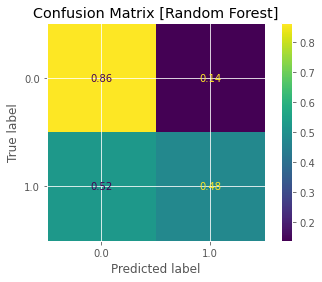

In [6]:
plot_metric(rf_classifier, validX, validY, "Random Forest")